# 차원축소 Assignment1

# ''' ? ''' 이 있는 부분을 채워주세요 

참고하셔야 하는 함수들은 링크 달아드렸으니 들어가서 확인해보세요

무작정 빈칸 채우기가 아니라 꼭 차원축소 과정을 이해하시면서 과제를 진행하시면 좋겠습니다!!!

또 질문은 언제나 환영이니 과제하다가 궁금하신것 있으시면 자유롭게 물어보세요!!

# 1) PCA의 과정 차근차근 밟아보기

**PCA**

: Principal Component Analysis, 주성분 분석
- 대표적인 차원 축소 알고리즘
- PCA 단계
  1. 학습 데이터셋에서 분산이 최대인 축(axis)을 찾는다. 
  2. 이렇게 찾은 첫번째 축과 직교(orthogonal)하면서 분산이 최대인 두 번째 축을 찾는다.
  3. 첫 번째 축과 두 번째 축에 직교하고 분산을 최대한 보존하는 세 번째 축을 찾는다.
  4. 1~3과 같은 방법으로 데이터셋의 차원(특성 수)만큼의 축을 찾는다.



In [1]:
#기본 모듈 불러오기
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
import random

In [2]:
#설명변수 x1, x2, x3
x1 = [95, 91, 66, 94, 68, 63, 12, 73, 93, 51, 13, 70, 63, 63, 97, 56, 67, 96, 75, 6]
x2 = [56, 27, 25, 1, 9, 80, 92, 69, 6, 25, 83, 82, 54, 97, 66, 93, 76, 59, 94, 9]
x3 = [57, 34, 9, 79, 4, 77, 100, 42, 6, 96, 61, 66, 9, 25, 84, 46, 16, 63, 53, 30]

In [3]:
#설명변수들을 하나의 행렬로
X = np.stack((x1,x2,x3),axis=0)

In [4]:
X = pd.DataFrame(X.T,columns=['x1','x2','x3'])

In [5]:
X

,x1,x2,x3
0,95,56,57
1,91,27,34
2,66,25,9
3,94,1,79
4,68,9,4
5,63,80,77
6,12,92,100
7,73,69,42
8,93,6,6
9,51,25,96


### 1-1) 먼저 PCA를 시작하기 전 데이터 scaling!!!! 매우 중요합니다!

https://datascienceschool.net/03%20machine%20learning/02.01%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%A0%84%EC%B2%98%EB%A6%AC%20%EA%B8%B0%EC%B4%88.html?highlight=%EC%A0%84%EC%B2%98%EB%A6%AC  를 참고하시면 도움이 될거에요

**scaling을 하는 이유?**

선형회귀분석을 할 때는 조건수(condition number)의 영향때문에 데이터의 평균을 0으로 표준편차를 1로 만드는 스케일링(scaling) 작업을 하는 것이 분석 결과의 품질을 높일 수 있으므로

**조건수(condition number)**

: 함수의 입력인 x의 작은 변화율에 대해 함수의 출력인 y의 변화율이 얼마인지를 나타내는 수 (= 함수의 민감도를 측정하는 지표)
- 조건수가 낮을수록 공분산 행렬의 변동성을 줄여 분석 결과의 변동을 줄일 수 있으므로 overfitting 확률이 낮아짐
- 조건수를 낮추는 방법
  1.   변수들 간 단위차이를 없애주는 **scaling** 사용
  2.   독립변수들 간 상관관계가 높은 **다중공선성 제거** (VIF, PCA 등 사용)
  3. 독립변수들 간 의존성이 높은 변수들에 **페널티 부과**



In [6]:
#scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

X_std

array([[ 1.08573604,  0.02614175,  0.30684189],
       [ 0.93801686, -0.86575334, -0.46445467],
       [ 0.01477192, -0.92726334, -1.30282049],
       [ 1.04880625, -1.66538341,  1.04460382],
       [ 0.08863151, -1.41934339, -1.47049366],
       [-0.09601747,  0.76426183,  0.97753455],
       [-1.97943714,  1.13332186,  1.74883111],
       [ 0.2732805 ,  0.42595679, -0.1961776 ],
       [ 1.01187645, -1.5116084 , -1.40342439],
       [-0.53917504, -0.92726334,  1.61469258],
       [-1.94250735,  0.85652683,  0.44098042],
       [ 0.16249111,  0.82577183,  0.60865359],
       [-0.09601747, -0.03536825, -1.30282049],
       [-0.09601747,  1.28709688, -0.76626636],
       [ 1.15959564,  0.33369178,  1.21227698],
       [-0.35452606,  1.16407687, -0.06203907],
       [ 0.05170172,  0.64124181, -1.06807806],
       [ 1.12266584,  0.11840676,  0.50804969],
       [ 0.3471401 ,  1.19483187,  0.17270336],
       [-2.20101593, -1.41934339, -0.5985932 ]])

In [7]:
features = X_std.T

In [8]:
features

array([[ 1.08573604,  0.93801686,  0.01477192,  1.04880625,  0.08863151,
        -0.09601747, -1.97943714,  0.2732805 ,  1.01187645, -0.53917504,
        -1.94250735,  0.16249111, -0.09601747, -0.09601747,  1.15959564,
        -0.35452606,  0.05170172,  1.12266584,  0.3471401 , -2.20101593],
       [ 0.02614175, -0.86575334, -0.92726334, -1.66538341, -1.41934339,
         0.76426183,  1.13332186,  0.42595679, -1.5116084 , -0.92726334,
         0.85652683,  0.82577183, -0.03536825,  1.28709688,  0.33369178,
         1.16407687,  0.64124181,  0.11840676,  1.19483187, -1.41934339],
       [ 0.30684189, -0.46445467, -1.30282049,  1.04460382, -1.47049366,
         0.97753455,  1.74883111, -0.1961776 , -1.40342439,  1.61469258,
         0.44098042,  0.60865359, -1.30282049, -0.76626636,  1.21227698,
        -0.06203907, -1.06807806,  0.50804969,  0.17270336, -0.5985932 ]])

### 1-2) 다음으로 공분산 행렬을 구합니다

https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html 를 참고하시면 도움이 될거에요

**공분산**

: 2개의 특성(또는 변수)간의 상관정도를 나타낸 값

- 공분산 행렬 : 
  - `cov = np.dot(m * w, m.T) * v1 / (v1**2 - ddof * v2)` 이용!

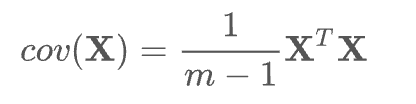


In [9]:
X_cov = np.cov(features)

X_cov

array([[ 1.05263158, -0.2037104 , -0.12079228],
       [-0.2037104 ,  1.05263158,  0.3125801 ],
       [-0.12079228,  0.3125801 ,  1.05263158]])

### 1-3) 이제 고유값과 고유벡터를 구합니다

실습코드를 참고해주세요

**고유값 & 고유벡터**

`np.lin.eig`를 이용해 eigenvalue(w)와 eigenvector(v)를 구할 수 있다.

- 고유값(eigenvalue) = w
- 고유벡터(eigenvector) = v

(1) 고유값 & 고유벡터 구하기

In [13]:
import numpy.linalg as lin

lin.eig(X_cov)

eigenvalues = lin.eig(X_cov)[0]  # 고유값
eigenvectors = lin.eig(X_cov)[1] # 고유벡터

print('eigenvalue : ', eigenvalues)
print('eigenvectors : ', eigenvectors)

eigenvalue :  [1.48756162 0.94435407 0.72597904]
eigenvectors :  [[ 0.47018528 -0.85137353 -0.23257022]
 [-0.64960236 -0.15545725 -0.74421087]
 [-0.59744671 -0.50099516  0.62614797]]


(2) `mat` 행렬 생성하기

- 고유값 분해를 위한 대각행렬 `mat` 생성

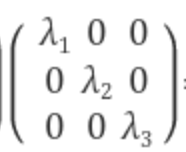

In [14]:
# mat 행렬 생성
mat = np.zeros((3,3)) # 0으로 가득찬 새로운 array 생성

mat

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [15]:
# 각 고유값을 mat 대각 행렬에 채움
mat[0][0] = eigenvalues[0]
mat[1][1] = eigenvalues[1]
mat[2][2] = eigenvalues[2]

mat

array([[1.48756162, 0.        , 0.        ],
       [0.        , 0.94435407, 0.        ],
       [0.        , 0.        , 0.72597904]])

### 1-4) 고유값 분해: 고유값 분해의 곱으로 원래 공분산 행렬을 구해봅니다

https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html 를 참고해주세요

A = 𝑃Λ𝑃`
이 식 기억나죠?

**대각화 분해(eigendecomposition)**
 
: 행렬 A는 자신의 고유벡터들을 열벡터로 하는 행렬과 고유값을 대각원소로 하는 행렬의 곱으로 대각화 분해함
- `numpy.dot` 사용! (numpy array들을 곱할때 이용됨)

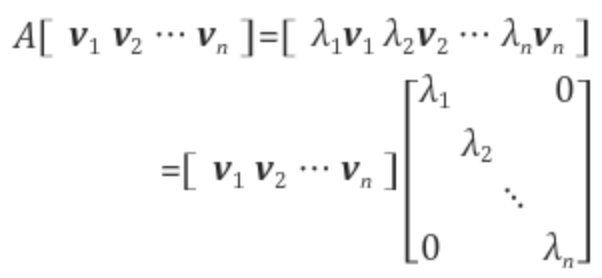

In [16]:
# 고유값 분해 곱
np.dot(np.dot(eigenvectors,mat),eigenvectors.T)

array([[ 1.05263158, -0.2037104 , -0.12079228],
       [-0.2037104 ,  1.05263158,  0.3125801 ],
       [-0.12079228,  0.3125801 ,  1.05263158]])

In [17]:
# 분해된 고유값 shape 확인
eigenvectors.shape

(3, 3)

### 1-5) 마지막으로 고유 벡터 축으로 값을 변환합니다


https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html

**고유 벡터 축**

첫 번째 고유 벡터 축은 가장 큰 데이터 변동성을 기반으로 생성되므로, 고유값이 가장 큰 고유 벡터값을 축으로 추출한다.
- 데이터들의 평균점을 지나는 직선들 중에서 데이터들을 직선에 투영(projection)시켰을 때 해당 직선을 따라서 데이터의 분산이 최대가 되는 방향의 직선을 구함
- `numpy.concatenate` 사용! (numpy 배열들을 하나로 합치는데 이용됨)

In [18]:
# 모든 data projection 진행
def new_coordinates(X,eigenvectors):
    for i in range(eigenvectors.shape[0]):
        if i == 0:
            new = [X.dot(eigenvectors.T[i])]  # X, eigenvector 행렬곱
        else:
            new = np.concatenate((new,[X.dot(eigenvectors.T[i])]),axis=0)
    return new.T

In [19]:
# 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환
new_coordinates(X_std,eigenvectors)

array([[ 0.31019368, -1.08215716, -0.07983642],
       [ 1.28092404, -0.43132556,  0.13533091],
       [ 1.38766381,  0.78428014, -0.12911446],
       [ 0.95087515, -1.15737142,  1.6495519 ],
       [ 1.84222365,  0.88189889,  0.11493111],
       [-1.12563709, -0.52680338,  0.06564012],
       [-2.71174416,  0.63290138,  0.71195473],
       [-0.03100441, -0.20059783, -0.50339479],
       [ 2.29618509,  0.07661447,  0.01087174],
       [-0.61585248, -0.205764  ,  1.82651199],
       [-1.73320252,  1.29971699,  0.09045178],
       [-0.82366049, -0.57164535, -0.27123176],
       [ 0.75619512,  0.73995175, -0.76710616],
       [-0.42344386,  0.26555394, -1.41533681],
       [-0.39581307, -1.64646874,  0.24104031],
       [-0.88581498,  0.15195119, -0.82271209],
       [ 0.24587691,  0.39139878, -1.15801831],
       [ 0.14741103, -1.22874561, -0.03110396],
       [-0.7161265 , -0.56781471, -0.86180345],
       [ 0.24475107,  2.39442622,  1.19337361]])

# 2) PCA를 구현해보기

위의 과정을 하나의 함수로 표현해주세요!

1)에서 진행한 과정을 그대로 가져오면 됩니다..! , 

위에서 만든 함수(new_coordinate)도 가져오셔서 사용해도 좋아요!

+하지만 이 함수는 number이라는 인자를 받아서 pca에서 주성분 개수를 고려하도록 합니다!

고유값이 큰 축 순서로 정렬하는 과정 + 주성분 개수 number을 고려해야한다는 점을 유의해서 함수를 정의해주세요


In [20]:
eigenvectors

array([[ 0.47018528, -0.85137353, -0.23257022],
       [-0.64960236, -0.15545725, -0.74421087],
       [-0.59744671, -0.50099516,  0.62614797]])

In [23]:
from sklearn.preprocessing import StandardScaler

def MYPCA(X,number):
    # Scaling
    scaler = StandardScaler()
    x_std = scaler.fit_transform(X)
    features = x_std.T

    # Covariance
    cov_matrix = np.cov(features) 
    
    # eigenvalues, eigenvectors
    eigenvalues = lin.eig(cov_matrix)[0] #eigenvalue
    eigenvectors = lin.eig(cov_matrix)[1] #eigenvector
    
    #np.dot(np.dot(eigenvectors,mat),eigenvectors.T)

    # 새로운 고유벡터 축 추출
    new_coordinates(x_std,eigenvectors)
    
    new_coordinate = new_coordinates(x_std,eigenvectors)
    
    index = eigenvalues.argsort()
    index = list(index)
    
    # 고유값 정렬 및 고유값 크기에 따라 고유벡터도 정렬
    # def new_coordinates(X,eigenvectors):
    for i in range(number):
        if i==0:
            new = [new_coordinate[:,index.index(i)]] # X, eigenvector 행렬곱
        else:
            new = np.concatenate(([new_coordinate[:,index.index(i)]],new),axis=0)
    return new.T # 새로운 축으로 변환되어 나타난 데이터 return

In [24]:
MYPCA(X,3)

# 새로운 축으로 잘 변환되어서 나타나나요? 
# 위에서 했던 PCA랑은 차이가 있을 수 있어요 
# 왜냐하면 위에서는 고유값이 큰 축 순서로 정렬을 안했었거든요

array([[ 0.31019368, -1.08215716, -0.07983642],
       [ 1.28092404, -0.43132556,  0.13533091],
       [ 1.38766381,  0.78428014, -0.12911446],
       [ 0.95087515, -1.15737142,  1.6495519 ],
       [ 1.84222365,  0.88189889,  0.11493111],
       [-1.12563709, -0.52680338,  0.06564012],
       [-2.71174416,  0.63290138,  0.71195473],
       [-0.03100441, -0.20059783, -0.50339479],
       [ 2.29618509,  0.07661447,  0.01087174],
       [-0.61585248, -0.205764  ,  1.82651199],
       [-1.73320252,  1.29971699,  0.09045178],
       [-0.82366049, -0.57164535, -0.27123176],
       [ 0.75619512,  0.73995175, -0.76710616],
       [-0.42344386,  0.26555394, -1.41533681],
       [-0.39581307, -1.64646874,  0.24104031],
       [-0.88581498,  0.15195119, -0.82271209],
       [ 0.24587691,  0.39139878, -1.15801831],
       [ 0.14741103, -1.22874561, -0.03110396],
       [-0.7161265 , -0.56781471, -0.86180345],
       [ 0.24475107,  2.39442622,  1.19337361]])

# 3) sklearn이랑 비교를 해보기

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html 를 참고하시면 도움이 될거에요

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

pca.fit_transform(X_std)

array([[-0.31019368, -1.08215716, -0.07983642],
       [-1.28092404, -0.43132556,  0.13533091],
       [-1.38766381,  0.78428014, -0.12911446],
       [-0.95087515, -1.15737142,  1.6495519 ],
       [-1.84222365,  0.88189889,  0.11493111],
       [ 1.12563709, -0.52680338,  0.06564012],
       [ 2.71174416,  0.63290138,  0.71195473],
       [ 0.03100441, -0.20059783, -0.50339479],
       [-2.29618509,  0.07661447,  0.01087174],
       [ 0.61585248, -0.205764  ,  1.82651199],
       [ 1.73320252,  1.29971699,  0.09045178],
       [ 0.82366049, -0.57164535, -0.27123176],
       [-0.75619512,  0.73995175, -0.76710616],
       [ 0.42344386,  0.26555394, -1.41533681],
       [ 0.39581307, -1.64646874,  0.24104031],
       [ 0.88581498,  0.15195119, -0.82271209],
       [-0.24587691,  0.39139878, -1.15801831],
       [-0.14741103, -1.22874561, -0.03110396],
       [ 0.7161265 , -0.56781471, -0.86180345],
       [-0.24475107,  2.39442622,  1.19337361]])

In [26]:
# 앞에서 구현한 PCA 값
MYPCA(X,3)

array([[ 0.31019368, -1.08215716, -0.07983642],
       [ 1.28092404, -0.43132556,  0.13533091],
       [ 1.38766381,  0.78428014, -0.12911446],
       [ 0.95087515, -1.15737142,  1.6495519 ],
       [ 1.84222365,  0.88189889,  0.11493111],
       [-1.12563709, -0.52680338,  0.06564012],
       [-2.71174416,  0.63290138,  0.71195473],
       [-0.03100441, -0.20059783, -0.50339479],
       [ 2.29618509,  0.07661447,  0.01087174],
       [-0.61585248, -0.205764  ,  1.82651199],
       [-1.73320252,  1.29971699,  0.09045178],
       [-0.82366049, -0.57164535, -0.27123176],
       [ 0.75619512,  0.73995175, -0.76710616],
       [-0.42344386,  0.26555394, -1.41533681],
       [-0.39581307, -1.64646874,  0.24104031],
       [-0.88581498,  0.15195119, -0.82271209],
       [ 0.24587691,  0.39139878, -1.15801831],
       [ 0.14741103, -1.22874561, -0.03110396],
       [-0.7161265 , -0.56781471, -0.86180345],
       [ 0.24475107,  2.39442622,  1.19337361]])

**Output**

값은 동일하지만, 부호가 반대로 되었다. 절댓값 반환이 아닌 numpy array의 부호만을 바꾸는 함수는 따로 존재하지 않아, 그대로 두었다.